In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../derivedData/train_cleaned.csv')

In [6]:
df

,Id,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,...,SaleType.ConLw,SaleType.New,SaleType.Oth,SaleType.WD,SaleCondition.Abnorml,SaleCondition.AdjLand,SaleCondition.Alloca,SaleCondition.Family,SaleCondition.Normal,SaleCondition.Partial
0,1,65.0,8450,4,1,4,1,4,7,5,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,4,1,4,1,1,6,8,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,3,1,4,1,4,7,5,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,3,1,4,1,4,7,5,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,3,1,4,1,4,8,5,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1456,62.0,7917,4,1,4,1,4,6,5,...,0,0,0,1,0,0,0,0,1,0
1452,1457,85.0,13175,4,1,4,1,1,6,6,...,0,0,0,1,0,0,0,0,1,0
1453,1458,66.0,9042,4,1,4,1,4,7,9,...,0,0,0,1,0,0,0,0,1,0
1454,1459,68.0,9717,4,1,4,1,1,5,6,...,0,0,0,1,0,0,0,0,1,0


In [101]:
n_obs = df.shape[0]

np.random.seed(42)
shuffle_list = np.random.choice(range(n_obs), size = n_obs)

train, test = df[0:int(np.floor(len(shuffle_list)*.7))], df[int(np.floor(len(shuffle_list)*.7)):n_obs]

# Temporary handling missing data
train = train.drop(train.loc[train['GarageYrBlt'].isna()].index)
test = test.drop(test.loc[test['GarageYrBlt'].isna()].index)
train = train.drop(train.loc[train['MasVnrArea'].isna()].index)
test = test.drop(test.loc[test['MasVnrArea'].isna()].index)

X_train, Y_train = train.loc[:, train.columns != 'SalePrice'], train['SalePrice']
X_test, Y_test = test.loc[:, test.columns != 'SalePrice'], test['SalePrice']

# Linear regression

In [102]:
lin = LinearRegression(normalize=False)

lin.fit(X_train, Y_train)
lin.score(X_test, Y_test)

0.6920342268982022

# Ridge

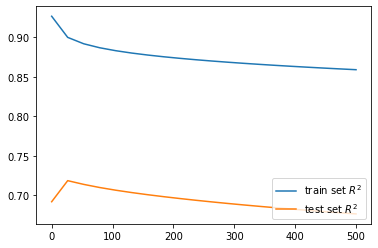

In [103]:
ridge = Ridge()

ridge_train_R2 = []
ridge_test_R2 = []

alpha_range = np.linspace(1e-3,500,20)

for alpha in alpha_range:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, Y_train)
    ridge_train_R2.append(ridge.score(X_train, Y_train))
    ridge_test_R2.append(ridge.score(X_test, Y_test))
    
plt.plot(alpha_range, ridge_train_R2, label=r'train set $R^2$')
plt.plot(alpha_range, ridge_test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

Clearly overfitting ! Need model simplification

# Lasso

/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100810916850.00873, tolerance: 606258969.5627897
  positive)


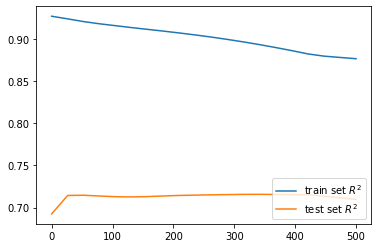

In [104]:
lasso = Lasso(max_iter=10000)

lasso_train_R2 = []
lasso_test_R2 = []

for alpha in alpha_range:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, Y_train)
    lasso_train_R2.append(lasso.score(X_train, Y_train))
    lasso_test_R2.append(lasso.score(X_test, Y_test))
    
plt.plot(alpha_range, lasso_train_R2, label=r'train set $R^2$')
plt.plot(alpha_range, lasso_test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

# Elastic-net

/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227871273684.35083, tolerance: 606258969.5627897
  positive)
/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528612348077.19934, tolerance: 606258969.5627897
  positive)
/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61494449519.19409, tolerance: 606258969.5627897
  positive)


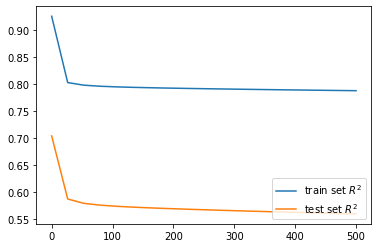

In [105]:
rho = .5

elnet = ElasticNet(l1_ratio=rho, max_iter=10000)

elnet_train_R2 = []
elnet_test_R2 = []

for alpha in alpha_range:
    elnet.set_params(alpha=alpha)
    elnet.fit(X_train, Y_train)
    elnet_train_R2.append(elnet.score(X_train, Y_train))
    elnet_test_R2.append(elnet.score(X_test, Y_test))
    
plt.plot(alpha_range, elnet_train_R2, label=r'train set $R^2$')
plt.plot(alpha_range, elnet_test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

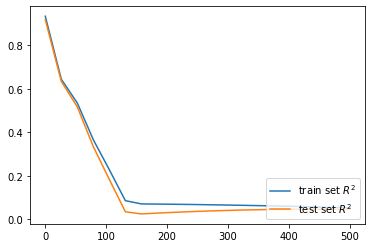

In [5]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

df['logSalePrice'] = np.log(df['SalePrice'])

X = df.drop(['SalePrice', 'logSalePrice'], axis=1)
y = df['logSalePrice']
lasso = Lasso(max_iter=10000)

train_accuracy = []
test_accuracy = []

alpha_range = np.linspace(1e-3, 500, 20)

kf = KFold(n_splits=4, shuffle=False)

for alpha in alpha_range:
    train_temp = []
    test_temp = []
    for index_train, index_test in kf.split(X, y):
        lasso.set_params(alpha=alpha)
        lasso.fit(X.iloc[index_train, :], y[index_train])

        train_temp.append(lasso.score(X.iloc[index_train, :], y[index_train]))
        test_temp.append(lasso.score(X.iloc[index_test, :], y[index_test]))

    train_accuracy.append(np.mean(train_temp))
    test_accuracy.append(np.mean(test_temp))

plt.plot(alpha_range, train_accuracy, label=r'train set $R^2$')
plt.plot(alpha_range, test_accuracy, label=r'test set $R^2$')
plt.legend(loc=4)